# 11. Modelling

## 11.1. AR(Autoregressive) Model

In [1]:
# Import modules
import numpy as np
import pandas as pd

from statsmodels.tsa.ar_model import AutoReg  # Autoregression
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
# Set Parameters
n = 100  # Number of data points
ar_params = [0.7]  # Autoregressive Parameter
ma_params = []     # Moving Average Parameter
residuals = np.random.normal(0, 1, n)   # (Mean 0, Std 1, Number of residuals n)

In [3]:
# Create AR(1) Model
data = [0]  # Initial value

for i in range(1, n):
    data.append(ar_params[0] * data[i-1] + residuals[i])

data

[0,
 0.7446090837717255,
 -0.381174590592511,
 -0.7550018898539816,
 0.4289041800402099,
 1.2547959661102777,
 1.8469158886739405,
 3.209452151061713,
 1.3872417245670214,
 1.1251345482782118,
 -0.05125907008859565,
 -0.9845486986317604,
 0.26482618230737665,
 0.14609590391888558,
 1.375180046283052,
 1.2158491085913763,
 -1.0341620537872895,
 0.7591351662866211,
 0.4023769653835839,
 0.6300754510841677,
 -1.14415602919872,
 -0.9740279177027618,
 -1.4038755660713456,
 -1.1146356694062782,
 -0.46654541147148887,
 0.989761039992987,
 1.4404139532117421,
 1.1890788269425334,
 -1.0611210901160608,
 0.15075852401854817,
 0.5602035858974742,
 0.15298183412753605,
 -0.2856992259314759,
 1.892966923686854,
 0.9015727511826022,
 1.4884661692293963,
 2.2472748487301715,
 -0.9519130304064072,
 -1.322487477292151,
 0.07340668045304388,
 -0.8651305875858957,
 -0.09747958593330386,
 -0.6473690930380729,
 -2.365198691176155,
 -3.4536220959161774,
 -0.8089094972958579,
 -1.0976895655716135,
 -1.412078

In [4]:
# Create a dataframe
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Values': data
})

df

,Date,Values
0,2023-01-01,0.000000
1,2023-01-02,0.744609
2,2023-01-03,-0.381175
3,2023-01-04,-0.755002
4,2023-01-05,0.428904
...,...,...
95,2023-04-06,0.287150
96,2023-04-07,-0.763062
97,2023-04-08,-2.381670
98,2023-04-09,-3.417194


In [5]:
# Fit AR(1) model
model = AutoReg(df['Values'], lags=1)  # lags=1: First order Aggressive model
results = model.fit()

#print(results.summary())
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 Values   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -148.198
Method:               Conditional MLE   S.D. of innovations              1.081
Date:                Fri, 02 Jun 2023   AIC                            302.397
Time:                        22:08:45   BIC                            310.182
Sample:                             1   HQIC                           305.547
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0792      0.109     -0.727      0.467      -0.293       0.134
Values.L1      0.5499      0.090      6.079      0.000       0.373       0.727
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8186           +0.0000j            1.8186            0.0000
-----------------------------------------------------------------------------
"""

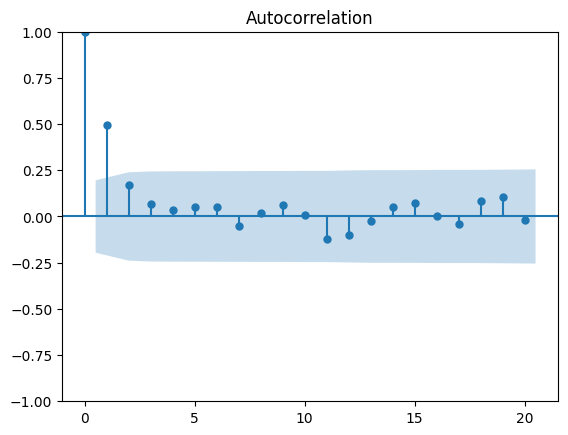

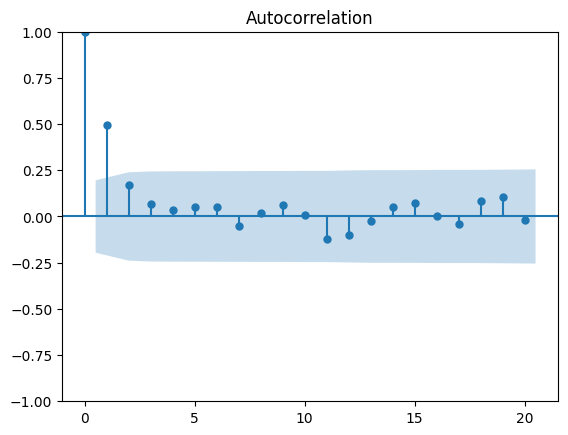

In [6]:
# Visualization: ACF Graph
plot_acf(df['Values'], lags=20)

## 11.2. Moving Average Model

In [7]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [8]:
# Set Parameters
np.random.seed(85)

n = 100
ma_params = [0.4, -0.2]  # Coefficient
residuals = np.random.normal(0, 1, n)  # (Mean 0, Std 1, Number of residuals n)

In [9]:
# Generate MA(2) Model
data = [0, 0]  # Initial value

for i in range(2, n):
    data.append(ma_params[0] * residuals[i-1] + ma_params[1] * residuals[i-2] + residuals[i])

In [10]:
# Create a dataframe
df = pd.DataFrame({'Values': data})

df

,Values
0,0.000000
1,0.000000
2,1.914464
3,-1.386208
4,-0.543617
...,...
95,-1.888618
96,-0.035981
97,-0.394376
98,-1.618467


In [11]:
# Fit MA(2) Model
model = ARIMA(df['Values'], order=(0, 0, 2))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Values   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -144.977
Date:                Fri, 02 Jun 2023   AIC                            297.955
Time:                        22:08:45   BIC                            308.375
Sample:                             0   HQIC                           302.172
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1144      0.122     -0.942      0.346      -0.353       0.124
ma.L1          0.2975      0.098      3.035      0.002       0.105       0.490
ma.L2         -0.1764      0.098     -1.799      0.072      -0.369       0.016
sigma2         1.0614      0.202      5.245      0.000       0.665       1.458
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.99   Prob(JB):                         0.12
Heteroskedasticity (H):               0.92   Skew:                             0.33
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

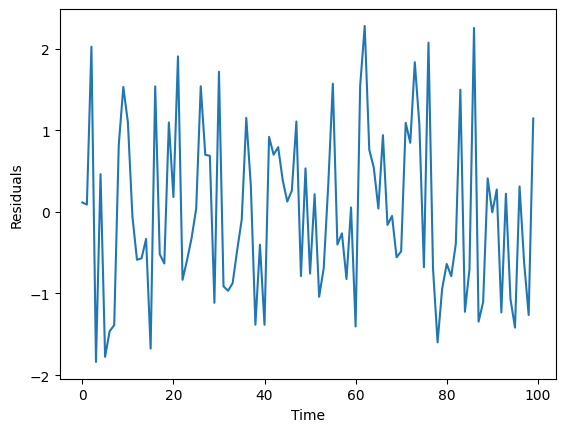

In [12]:
# Visualization
plt.plot(results.resid)

plt.xlabel('Time')
plt.ylabel('Residuals')

plt.show()